# Desafio Estaciones de Servicio

### Grupo 7: Leonardo Campos, Marcos Garcia Verdier, Juan Molinari, Barbara Malamud


In [1]:
import pandas as pd
import numpy as np
import re
import unidecode
import matplotlib.pyplot as plt
import seaborn as sn
import geopandas as gpd
from geopandas import GeoDataFrame

# Primera base de ventas estaciones de servicio MIn de energia

In [2]:
df = pd.read_excel ('Total_estac_argentinaF.xlsx')
df

,Nro Inscripción,Provincia,Localidad,Operador,Bandera,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,AVG
0,101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,400.000000,666.000000,0.000000,0.000000,0.000000,50.078000,0.000000,0.000000,4400.000000,0.000000,112.000000,20.000000,470.673167
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,168.020006,69.250000,71.270002,70.099998,111.059997,29.760000,135.250002,201.829996,169.869995,168.540000,169.099993,168.889995,127.744999
2,104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,417.727009,392.201992,348.459991,370.450003,363.768999,403.974993,409.653997,415.914999,402.354000,439.754004,430.179001,439.754004,402.849416
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,880.668998,802.810002,669.922982,625.799994,584.704996,588.437992,860.578019,673.117993,679.650002,791.304985,768.820015,835.826004,730.136832
4,107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,721.660004,752.280006,768.499985,668.440002,624.160000,770.220016,877.069984,832.539989,926.420006,847.580002,827.340000,841.140007,788.112500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.180000,45.939999,4.926667
4596,9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.725401,6.893783
4597,9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000,12.083333
4598,9790,SANTA FE,CHABAS,S.C.C. COMBUSTIBLES SRL,PUMA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.770000,3.897500


In [3]:
df.rename(columns={'Nro Inscripción':'code'}, inplace=True)

In [4]:
df.set_index('code')

,Provincia,Localidad,Operador,Bandera,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,AVG
code,,,,,,,,,,,,,,,,,
101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,400.000000,666.000000,0.000000,0.000000,0.000000,50.078000,0.000000,0.000000,4400.000000,0.000000,112.000000,20.000000,470.673167
102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,168.020006,69.250000,71.270002,70.099998,111.059997,29.760000,135.250002,201.829996,169.869995,168.540000,169.099993,168.889995,127.744999
104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,417.727009,392.201992,348.459991,370.450003,363.768999,403.974993,409.653997,415.914999,402.354000,439.754004,430.179001,439.754004,402.849416
105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,880.668998,802.810002,669.922982,625.799994,584.704996,588.437992,860.578019,673.117993,679.650002,791.304985,768.820015,835.826004,730.136832
107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,721.660004,752.280006,768.499985,668.440002,624.160000,770.220016,877.069984,832.539989,926.420006,847.580002,827.340000,841.140007,788.112500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.180000,45.939999,4.926667
9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.725401,6.893783
9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000,12.083333


### Segunda base de datos con latitudes y longitudes

In [5]:
dflatlon = pd.read_csv('NWP2019 v3.csv')
dflatlon

,SEN,Etiqueta,PBL,SHIP TO,MOSO,Zona,PBL Name,Razon Social,Bandera,CUIT,...,Super,Premium,Diesel,Euro,Total,GNC,Longitud,Latitud,Unnamed: 23,Unnamed: 24
0,3492.0,(3492) AGIRA - MARTINA SA,-,-,-,-,-,MARTINA SA,AGIRA,30-62513667-5,...,0,0,0,0,0.0,82,NaN,NaN,NaN,NaN
1,6202.0,(6202) AGIRA - GNC CAMPANA S.R.L.,-,-,-,-,-,GNC CAMPANA S.R.L.,AGIRA,30-70885485-5,...,0,0,0,0,0.0,149,-58.971928,-34.172607,NaN,NaN
2,6475.0,(6475) AGIRA - VILAXOAN SRL,-,-,-,-,-,VILAXOAN SRL,AGIRA,30-68495279-6,...,42,2,0,13,57.0,231,-58.326628,-34.799380,NaN,NaN
3,7122.0,(7122) AGIRA - MARCOS PAZ GNC S.A.,-,-,-,-,-,MARCOS PAZ GNC S.A.,AGIRA,30-70913609-3,...,0,0,0,0,0.0,137,-58.827125,-34.771911,NaN,NaN
4,7253.0,(7253) AGIRA - LUTAC SA,-,-,-,-,-,LUTAC SA,AGIRA,30-70879517-4,...,39,2,0,12,53.0,132,-58.461768,-34.794907,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,9775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4908,9781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4909,9786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4910,9787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
dflatlon = dflatlon.rename(columns={'SEN': 'code'})
dflatlon

,code,Etiqueta,PBL,SHIP TO,MOSO,Zona,PBL Name,Razon Social,Bandera,CUIT,...,Super,Premium,Diesel,Euro,Total,GNC,Longitud,Latitud,Unnamed: 23,Unnamed: 24
0,3492.0,(3492) AGIRA - MARTINA SA,-,-,-,-,-,MARTINA SA,AGIRA,30-62513667-5,...,0,0,0,0,0.0,82,NaN,NaN,NaN,NaN
1,6202.0,(6202) AGIRA - GNC CAMPANA S.R.L.,-,-,-,-,-,GNC CAMPANA S.R.L.,AGIRA,30-70885485-5,...,0,0,0,0,0.0,149,-58.971928,-34.172607,NaN,NaN
2,6475.0,(6475) AGIRA - VILAXOAN SRL,-,-,-,-,-,VILAXOAN SRL,AGIRA,30-68495279-6,...,42,2,0,13,57.0,231,-58.326628,-34.799380,NaN,NaN
3,7122.0,(7122) AGIRA - MARCOS PAZ GNC S.A.,-,-,-,-,-,MARCOS PAZ GNC S.A.,AGIRA,30-70913609-3,...,0,0,0,0,0.0,137,-58.827125,-34.771911,NaN,NaN
4,7253.0,(7253) AGIRA - LUTAC SA,-,-,-,-,-,LUTAC SA,AGIRA,30-70879517-4,...,39,2,0,12,53.0,132,-58.461768,-34.794907,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4907,9775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4908,9781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4909,9786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4910,9787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dflatlon.set_index('code')

,Etiqueta,PBL,SHIP TO,MOSO,Zona,PBL Name,Razon Social,Bandera,CUIT,Dirección,...,Super,Premium,Diesel,Euro,Total,GNC,Longitud,Latitud,Unnamed: 23,Unnamed: 24
code,,,,,,,,,,,,,,,,,,,,,
3492.0,(3492) AGIRA - MARTINA SA,-,-,-,-,-,MARTINA SA,AGIRA,30-62513667-5,ALVAREZ THOMAS 1781,...,0,0,0,0,0.0,82,NaN,NaN,NaN,NaN
6202.0,(6202) AGIRA - GNC CAMPANA S.R.L.,-,-,-,-,-,GNC CAMPANA S.R.L.,AGIRA,30-70885485-5,Bvrd Gral Lavalle 876,...,0,0,0,0,0.0,149,-58.971928,-34.172607,NaN,NaN
6475.0,(6475) AGIRA - VILAXOAN SRL,-,-,-,-,-,VILAXOAN SRL,AGIRA,30-68495279-6,AV. LACAZE 5390,...,42,2,0,13,57.0,231,-58.326628,-34.799380,NaN,NaN
7122.0,(7122) AGIRA - MARCOS PAZ GNC S.A.,-,-,-,-,-,MARCOS PAZ GNC S.A.,AGIRA,30-70913609-3,DOCTOR MARCOZ PAZ 824,...,0,0,0,0,0.0,137,-58.827125,-34.771911,NaN,NaN
7253.0,(7253) AGIRA - LUTAC SA,-,-,-,-,-,LUTAC SA,AGIRA,30-70879517-4,LUCIANO VALETTE 1296,...,39,2,0,12,53.0,132,-58.461768,-34.794907,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9775.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9781.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
dflatlon.drop_duplicates(subset='code', inplace=True)

In [9]:
df.dtypes

code           int64
Provincia     object
Localidad     object
Operador      object
Bandera       object
2019/01      float64
2019/02      float64
2019/03      float64
2019/04      float64
2019/05      float64
2019/06      float64
2019/07      float64
2019/08      float64
2019/09      float64
2019/10      float64
2019/11      float64
2019/12      float64
AVG          float64
dtype: object

In [10]:
dflatlon.dtypes

code                float64
Etiqueta             object
PBL                  object
SHIP TO              object
MOSO                 object
Zona                 object
PBL Name             object
Razon Social         object
Bandera              object
CUIT                 object
Dirección            object
Localidad            object
Provincia            object
Tarjeta de Flota     object
Tienda               object
Super                object
Premium              object
Diesel               object
Euro                 object
Total               float64
GNC                  object
Longitud            float64
Latitud             float64
Unnamed: 23          object
Unnamed: 24          object
dtype: object

In [11]:
df.set_index('code')

,Provincia,Localidad,Operador,Bandera,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,AVG
code,,,,,,,,,,,,,,,,,
101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,400.000000,666.000000,0.000000,0.000000,0.000000,50.078000,0.000000,0.000000,4400.000000,0.000000,112.000000,20.000000,470.673167
102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,168.020006,69.250000,71.270002,70.099998,111.059997,29.760000,135.250002,201.829996,169.869995,168.540000,169.099993,168.889995,127.744999
104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,417.727009,392.201992,348.459991,370.450003,363.768999,403.974993,409.653997,415.914999,402.354000,439.754004,430.179001,439.754004,402.849416
105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,880.668998,802.810002,669.922982,625.799994,584.704996,588.437992,860.578019,673.117993,679.650002,791.304985,768.820015,835.826004,730.136832
107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,721.660004,752.280006,768.499985,668.440002,624.160000,770.220016,877.069984,832.539989,926.420006,847.580002,827.340000,841.140007,788.112500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.180000,45.939999,4.926667
9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,82.725401,6.893783
9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,145.000000,12.083333


In [12]:
# primer merge entre bases
merged = df.merge(dflatlon, on=['code'], how='left')

In [13]:
merged

,code,Provincia_x,Localidad_x,Operador,Bandera_x,2019/01,2019/02,2019/03,2019/04,2019/05,...,Super,Premium,Diesel,Euro,Total,GNC,Longitud,Latitud,Unnamed: 23,Unnamed: 24
0,101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,400.000000,666.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,168.020006,69.250000,71.270002,70.099998,111.059997,...,9,3,10,101,123.0,0,-59.83470,-36.788170,NaN,NaN
2,104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,417.727009,392.201992,348.459991,370.450003,363.768999,...,217,108,60,23,408.0,0,-58.98882,-27.448803,NaN,NaN
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,880.668998,802.810002,669.922982,625.799994,584.704996,...,194,113,154,189,650.0,0,-64.33998,-33.081140,NaN,NaN
4,107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,721.660004,752.280006,768.499985,668.440002,624.160000,...,216,63,148,338,765.0,0,-60.04693,-26.924700,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4596,9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4597,9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4598,9790,SANTA FE,CHABAS,S.C.C. COMBUSTIBLES SRL,PUMA,0.000000,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
merged.columns

Index(['code', 'Provincia_x', 'Localidad_x', 'Operador', 'Bandera_x',
       '2019/01', '2019/02', '2019/03', '2019/04', '2019/05', '2019/06',
       '2019/07', '2019/08', '2019/09', '2019/10', '2019/11', '2019/12', 'AVG',
       'Etiqueta', 'PBL', 'SHIP TO', 'MOSO', 'Zona', 'PBL Name',
       'Razon Social', 'Bandera_y', 'CUIT', 'Dirección', 'Localidad_y',
       'Provincia_y', 'Tarjeta de Flota', 'Tienda', 'Super', 'Premium',
       'Diesel', 'Euro', 'Total', 'GNC', 'Longitud', 'Latitud', 'Unnamed: 23',
       'Unnamed: 24'],
      dtype='object')

In [15]:
merged=merged.drop(['2019/01', '2019/02', '2019/03', '2019/04', '2019/05', '2019/06',
       '2019/07', '2019/08', '2019/09', '2019/10', '2019/11', '2019/12', 'Etiqueta', 'PBL', 'SHIP TO', 'MOSO', 'Zona', 'PBL Name',
       'Razon Social', 'Bandera_y', 'CUIT', 'Dirección', 'Localidad_y','Provincia_y', 'Tarjeta de Flota', 'Tienda', 'Super', 'Premium',
       'Diesel', 'Euro', 'Total', 'GNC'], axis=1)
# tiramos las columnas que no nos sirven

In [16]:
merged

,code,Provincia_x,Localidad_x,Operador,Bandera_x,AVG,Longitud,Latitud,Unnamed: 23,Unnamed: 24
0,101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,470.673167,NaN,NaN,NaN,NaN
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.83470,-36.788170,NaN,NaN
2,104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,402.849416,-58.98882,-27.448803,NaN,NaN
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.33998,-33.081140,NaN,NaN
4,107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,788.112500,-60.04693,-26.924700,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
4595,9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,4.926667,NaN,NaN,NaN,NaN
4596,9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,6.893783,NaN,NaN,NaN,NaN
4597,9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,12.083333,NaN,NaN,NaN,NaN
4598,9790,SANTA FE,CHABAS,S.C.C. COMBUSTIBLES SRL,PUMA,3.897500,NaN,NaN,NaN,NaN


In [17]:
# creamos los puntos para columna geometry
merged = gpd.GeoDataFrame(merged, geometry=gpd.points_from_xy(merged.Longitud, merged.Latitud))

### Incorporamos la tercera base con las rutas

In [18]:
dfvolrutas = pd.read_excel ('listado_estaciones_rutas.xlsx')
dfvolrutas

,Nro. Inscripción,Operador,N Ruta,lat,lon
0,102,M.P.C.I. S.A.,3,-59.83470,-36.78817
1,105,LAS SIERRAS S.R.L,36,-64.33998,-33.08114
2,110,AGROMARE SRL,36,-57.57332,-35.27978
3,119,GUSTAVO JULIAN Y MIGUEL A ZUAIN,22,-65.67066,-39.27121
4,125,LOS PUENTES SRL,144,-68.38028,-34.65159
...,...,...,...,...,...
1283,9775,FRIOSAR SRL,2,0.00000,0.00000
1284,9781,PAN AMERICAN ENERGY SL SUCURSAL ARGENTINA (PAE),9,0.00000,0.00000
1285,9786,PAN AMERICAN ENERGY SL SUCURSAL ARGENTINA (PAE),9,0.00000,0.00000
1286,9787,FADEL SA,14,0.00000,0.00000


In [19]:
dfvolrutas = dfvolrutas.rename(columns={'Nro. Inscripción': 'code'})
dfvolrutas

,code,Operador,N Ruta,lat,lon
0,102,M.P.C.I. S.A.,3,-59.83470,-36.78817
1,105,LAS SIERRAS S.R.L,36,-64.33998,-33.08114
2,110,AGROMARE SRL,36,-57.57332,-35.27978
3,119,GUSTAVO JULIAN Y MIGUEL A ZUAIN,22,-65.67066,-39.27121
4,125,LOS PUENTES SRL,144,-68.38028,-34.65159
...,...,...,...,...,...
1283,9775,FRIOSAR SRL,2,0.00000,0.00000
1284,9781,PAN AMERICAN ENERGY SL SUCURSAL ARGENTINA (PAE),9,0.00000,0.00000
1285,9786,PAN AMERICAN ENERGY SL SUCURSAL ARGENTINA (PAE),9,0.00000,0.00000
1286,9787,FADEL SA,14,0.00000,0.00000


In [20]:
dfvolrutas.columns

Index(['code', 'Operador', 'N Ruta', 'lat', 'lon'], dtype='object')

In [21]:
dfvolrutas.set_index('code')

,Operador,N Ruta,lat,lon
code,,,,
102,M.P.C.I. S.A.,3,-59.83470,-36.78817
105,LAS SIERRAS S.R.L,36,-64.33998,-33.08114
110,AGROMARE SRL,36,-57.57332,-35.27978
119,GUSTAVO JULIAN Y MIGUEL A ZUAIN,22,-65.67066,-39.27121
125,LOS PUENTES SRL,144,-68.38028,-34.65159
...,...,...,...,...
9775,FRIOSAR SRL,2,0.00000,0.00000
9781,PAN AMERICAN ENERGY SL SUCURSAL ARGENTINA (PAE),9,0.00000,0.00000
9786,PAN AMERICAN ENERGY SL SUCURSAL ARGENTINA (PAE),9,0.00000,0.00000


In [22]:
merged

,code,Provincia_x,Localidad_x,Operador,Bandera_x,AVG,Longitud,Latitud,Unnamed: 23,Unnamed: 24,geometry
0,101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,470.673167,NaN,NaN,NaN,NaN,POINT (nan nan)
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.83470,-36.788170,NaN,NaN,POINT (-59.835 -36.788)
2,104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,402.849416,-58.98882,-27.448803,NaN,NaN,POINT (-58.989 -27.449)
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.33998,-33.081140,NaN,NaN,POINT (-64.340 -33.081)
4,107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,788.112500,-60.04693,-26.924700,NaN,NaN,POINT (-60.047 -26.925)
...,...,...,...,...,...,...,...,...,...,...,...
4595,9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,4.926667,NaN,NaN,NaN,NaN,POINT (nan nan)
4596,9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,6.893783,NaN,NaN,NaN,NaN,POINT (nan nan)
4597,9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,12.083333,NaN,NaN,NaN,NaN,POINT (nan nan)
4598,9790,SANTA FE,CHABAS,S.C.C. COMBUSTIBLES SRL,PUMA,3.897500,NaN,NaN,NaN,NaN,POINT (nan nan)


In [23]:
merged.set_index('code')

,Provincia_x,Localidad_x,Operador,Bandera_x,AVG,Longitud,Latitud,Unnamed: 23,Unnamed: 24,geometry
code,,,,,,,,,,
101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,470.673167,NaN,NaN,NaN,NaN,POINT (nan nan)
102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.83470,-36.788170,NaN,NaN,POINT (-59.835 -36.788)
104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,402.849416,-58.98882,-27.448803,NaN,NaN,POINT (-58.989 -27.449)
105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.33998,-33.081140,NaN,NaN,POINT (-64.340 -33.081)
107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,788.112500,-60.04693,-26.924700,NaN,NaN,POINT (-60.047 -26.925)
...,...,...,...,...,...,...,...,...,...,...
9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,4.926667,NaN,NaN,NaN,NaN,POINT (nan nan)
9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,6.893783,NaN,NaN,NaN,NaN,POINT (nan nan)
9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,12.083333,NaN,NaN,NaN,NaN,POINT (nan nan)


In [24]:
dfvolrutas.rename(columns={'N Ruta':'ruta'}, inplace=True) #simplificamos nombre para futuros usos

In [25]:
dfvolrutas.set_index('code')

,Operador,ruta,lat,lon
code,,,,
102,M.P.C.I. S.A.,3,-59.83470,-36.78817
105,LAS SIERRAS S.R.L,36,-64.33998,-33.08114
110,AGROMARE SRL,36,-57.57332,-35.27978
119,GUSTAVO JULIAN Y MIGUEL A ZUAIN,22,-65.67066,-39.27121
125,LOS PUENTES SRL,144,-68.38028,-34.65159
...,...,...,...,...
9775,FRIOSAR SRL,2,0.00000,0.00000
9781,PAN AMERICAN ENERGY SL SUCURSAL ARGENTINA (PAE),9,0.00000,0.00000
9786,PAN AMERICAN ENERGY SL SUCURSAL ARGENTINA (PAE),9,0.00000,0.00000


In [26]:
merged.dtypes

code              int64
Provincia_x      object
Localidad_x      object
Operador         object
Bandera_x        object
AVG             float64
Longitud        float64
Latitud         float64
Unnamed: 23      object
Unnamed: 24      object
geometry       geometry
dtype: object

In [27]:
dfvolrutas.dtypes

code          int64
Operador     object
ruta         object
lat         float64
lon         float64
dtype: object

In [28]:
dfvolrutas['ruta'] = pd.to_numeric(dfvolrutas.ruta, errors='coerce') # convertimos la ruta a numerico

In [29]:
merged1 = merged.merge(dfvolrutas, on=['code'], how='left')

In [30]:
merged1

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,Unnamed: 23,Unnamed: 24,geometry,Operador_y,ruta,lat,lon
0,101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,470.673167,NaN,NaN,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,NaN
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.83470,-36.788170,NaN,NaN,POINT (-59.835 -36.788),M.P.C.I. S.A.,3.0,-59.83470,-36.78817
2,104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,402.849416,-58.98882,-27.448803,NaN,NaN,POINT (-58.989 -27.449),NaN,NaN,NaN,NaN
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.33998,-33.081140,NaN,NaN,POINT (-64.340 -33.081),LAS SIERRAS S.R.L,36.0,-64.33998,-33.08114
4,107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,788.112500,-60.04693,-26.924700,NaN,NaN,POINT (-60.047 -26.925),NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,4.926667,NaN,NaN,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,NaN
4596,9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,6.893783,NaN,NaN,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,NaN
4597,9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,12.083333,NaN,NaN,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,NaN
4598,9790,SANTA FE,CHABAS,S.C.C. COMBUSTIBLES SRL,PUMA,3.897500,NaN,NaN,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,NaN


In [31]:
merged1=merged1.drop(['Unnamed: 23', 'Unnamed: 24', 'Operador_y'], axis=1)
#dropeamos columnas que no nos sirven

In [32]:
merged1

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,geometry,ruta,lat,lon
0,101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,470.673167,NaN,NaN,POINT (nan nan),NaN,NaN,NaN
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.83470,-36.788170,POINT (-59.835 -36.788),3.0,-59.83470,-36.78817
2,104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,402.849416,-58.98882,-27.448803,POINT (-58.989 -27.449),NaN,NaN,NaN
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.33998,-33.081140,POINT (-64.340 -33.081),36.0,-64.33998,-33.08114
4,107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,788.112500,-60.04693,-26.924700,POINT (-60.047 -26.925),NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
4595,9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,4.926667,NaN,NaN,POINT (nan nan),NaN,NaN,NaN
4596,9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,6.893783,NaN,NaN,POINT (nan nan),NaN,NaN,NaN
4597,9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,12.083333,NaN,NaN,POINT (nan nan),NaN,NaN,NaN
4598,9790,SANTA FE,CHABAS,S.C.C. COMBUSTIBLES SRL,PUMA,3.897500,NaN,NaN,POINT (nan nan),NaN,NaN,NaN


### Agregamos a la base los precios maximos de Nafta super por estacion

In [33]:
Preciosuper2019 = pd.read_excel ('PrecioSuper2019.xlsx')
Preciosuper2019

,Nro Inscripción,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,Maximo Precio 2019 Super
0,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,57.000000,57.000000
1,102,41.099998,41.790001,43.009998,44.970001,46.720001,47.419998,47.110001,47.110001,48.990002,48.990002,54.090000,57.509998,57.509998
2,104,41.590000,41.980000,42.950001,45.349998,46.689999,46.790001,47.959999,47.959999,50.290001,50.290001,55.389999,59.490002,59.490002
3,105,40.990002,41.689999,44.810001,46.560001,46.560001,47.259998,48.439999,48.439999,50.389999,50.389999,55.590000,59.340000,59.340000
4,107,41.590000,41.880001,44.990002,46.740002,46.740002,47.439999,48.630001,48.630001,50.590000,50.590000,55.840000,59.590000,59.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,9794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.299999,61.799999,61.799999
4297,9765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.090000,54.090000
4298,9802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.740002,58.740002
4299,9790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.990002,60.990002


In [34]:
Preciosuper2019.rename(columns={'Nro Inscripción':'code'}, inplace=True)

In [35]:
Preciosuper2019.drop_duplicates(subset='code', inplace=True)
Preciosuper2019

,code,2019/01,2019/02,2019/03,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,Maximo Precio 2019 Super
0,101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,57.000000,57.000000
1,102,41.099998,41.790001,43.009998,44.970001,46.720001,47.419998,47.110001,47.110001,48.990002,48.990002,54.090000,57.509998,57.509998
2,104,41.590000,41.980000,42.950001,45.349998,46.689999,46.790001,47.959999,47.959999,50.290001,50.290001,55.389999,59.490002,59.490002
3,105,40.990002,41.689999,44.810001,46.560001,46.560001,47.259998,48.439999,48.439999,50.389999,50.389999,55.590000,59.340000,59.340000
4,107,41.590000,41.880001,44.990002,46.740002,46.740002,47.439999,48.630001,48.630001,50.590000,50.590000,55.840000,59.590000,59.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4296,9794,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.299999,61.799999,61.799999
4297,9765,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.090000,54.090000
4298,9802,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.740002,58.740002
4299,9790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.990002,60.990002


In [36]:
merged2 = merged1.merge(Preciosuper2019, on=['code'], how='left')

In [37]:
merged2

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,geometry,ruta,...,2019/04,2019/05,2019/06,2019/07,2019/08,2019/09,2019/10,2019/11,2019/12,Maximo Precio 2019 Super
0,101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,470.673167,NaN,NaN,POINT (nan nan),NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,57.000000,57.000000
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.83470,-36.788170,POINT (-59.835 -36.788),3.0,...,44.970001,46.720001,47.419998,47.110001,47.110001,48.990002,48.990002,54.090000,57.509998,57.509998
2,104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,402.849416,-58.98882,-27.448803,POINT (-58.989 -27.449),NaN,...,45.349998,46.689999,46.790001,47.959999,47.959999,50.290001,50.290001,55.389999,59.490002,59.490002
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.33998,-33.081140,POINT (-64.340 -33.081),36.0,...,46.560001,46.560001,47.259998,48.439999,48.439999,50.389999,50.389999,55.590000,59.340000,59.340000
4,107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,788.112500,-60.04693,-26.924700,POINT (-60.047 -26.925),NaN,...,46.740002,46.740002,47.439999,48.630001,48.630001,50.590000,50.590000,55.840000,59.590000,59.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,4.926667,NaN,NaN,POINT (nan nan),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.299999,61.799999,61.799999
4596,9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,6.893783,NaN,NaN,POINT (nan nan),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,54.090000,54.090000
4597,9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,12.083333,NaN,NaN,POINT (nan nan),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,58.740002,58.740002
4598,9790,SANTA FE,CHABAS,S.C.C. COMBUSTIBLES SRL,PUMA,3.897500,NaN,NaN,POINT (nan nan),NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.990002,60.990002


In [38]:
merged2.columns

Index(['code', 'Provincia_x', 'Localidad_x', 'Operador_x', 'Bandera_x', 'AVG',
       'Longitud', 'Latitud', 'geometry', 'ruta', 'lat', 'lon', '2019/01',
       '2019/02', '2019/03', '2019/04', '2019/05', '2019/06', '2019/07',
       '2019/08', '2019/09', '2019/10', '2019/11', '2019/12',
       'Maximo Precio 2019 Super'],
      dtype='object')

In [39]:
merged2=merged2.drop(['2019/01', '2019/02', '2019/03',
       '2019/04', '2019/05', '2019/06', '2019/07', '2019/08', '2019/09',
       '2019/10', '2019/11', '2019/12'], axis=1)
# tiramos las columnas que no necesitamos

In [40]:
merged2

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,geometry,ruta,lat,lon,Maximo Precio 2019 Super
0,101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,470.673167,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,57.000000
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.83470,-36.788170,POINT (-59.835 -36.788),3.0,-59.83470,-36.78817,57.509998
2,104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,402.849416,-58.98882,-27.448803,POINT (-58.989 -27.449),NaN,NaN,NaN,59.490002
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.33998,-33.081140,POINT (-64.340 -33.081),36.0,-64.33998,-33.08114,59.340000
4,107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,788.112500,-60.04693,-26.924700,POINT (-60.047 -26.925),NaN,NaN,NaN,59.590000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,4.926667,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,61.799999
4596,9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,6.893783,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,54.090000
4597,9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,12.083333,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,58.740002
4598,9790,SANTA FE,CHABAS,S.C.C. COMBUSTIBLES SRL,PUMA,3.897500,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,60.990002


In [41]:
merged2.count()/4600 #Chequeamos cuan completas estan las variables

code                        1.000000
Provincia_x                 1.000000
Localidad_x                 1.000000
Operador_x                  1.000000
Bandera_x                   1.000000
AVG                         1.000000
Longitud                    0.904130
Latitud                     0.904130
geometry                    1.000000
ruta                        0.268043
lat                         0.270652
lon                         0.270652
Maximo Precio 2019 Super    0.935000
dtype: float64

## Empezamos a agregar datos estadisticos en general

#### Datos crecimiento parque automotor

In [42]:
parqueautomotor = pd.read_excel ('Evolucion Parque Automotor.xlsx')
parqueautomotor

,Unnamed: 0,2013 - 2014,2014 - 2015,2015 - 2016
0,BUENOS AIRES,0.074044,0.029770,0.032685
1,CAPITAL FEDERAL,0.038713,-0.001044,-0.002372
2,CATAMARCA,0.105766,0.041655,0.042576
3,CHACO,0.094349,0.041740,0.045151
4,CHUBUT,0.081225,0.033257,0.032825
5,CORDOBA,0.065797,0.022939,0.026363
6,CORRIENTES,0.100988,0.038244,0.040429
7,ENTRE RIOS,0.076429,0.033314,0.033027
8,FORMOSA,0.113212,0.036154,0.049175
9,JUJUY,0.351276,0.039110,0.040824


In [43]:
parqueautomotor.rename(columns={'Unnamed: 0':'Provincia_x'}, inplace=True)

In [44]:
parqueautomotor.dtypes

Provincia_x     object
2013 - 2014    float64
2014 - 2015    float64
2015 - 2016    float64
dtype: object

In [45]:
merged3 = merged2.merge(parqueautomotor, on=['Provincia_x'], how='left')

In [46]:
merged3

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,geometry,ruta,lat,lon,Maximo Precio 2019 Super,2013 - 2014,2014 - 2015,2015 - 2016
0,101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,470.673167,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,57.000000,0.038713,-0.001044,-0.002372
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.83470,-36.788170,POINT (-59.835 -36.788),3.0,-59.83470,-36.78817,57.509998,0.074044,0.029770,0.032685
2,104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,402.849416,-58.98882,-27.448803,POINT (-58.989 -27.449),NaN,NaN,NaN,59.490002,0.094349,0.041740,0.045151
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.33998,-33.081140,POINT (-64.340 -33.081),36.0,-64.33998,-33.08114,59.340000,0.065797,0.022939,0.026363
4,107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,788.112500,-60.04693,-26.924700,POINT (-60.047 -26.925),NaN,NaN,NaN,59.590000,0.094349,0.041740,0.045151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,4.926667,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,61.799999,0.093300,0.040977,0.045670
4596,9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,6.893783,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,54.090000,0.074044,0.029770,0.032685
4597,9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,12.083333,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,58.740002,0.094349,0.041740,0.045151
4598,9790,SANTA FE,CHABAS,S.C.C. COMBUSTIBLES SRL,PUMA,3.897500,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,60.990002,0.063278,0.022027,0.022501


In [47]:
merged3.count()/4600

code                        1.000000
Provincia_x                 1.000000
Localidad_x                 1.000000
Operador_x                  1.000000
Bandera_x                   1.000000
AVG                         1.000000
Longitud                    0.904130
Latitud                     0.904130
geometry                    1.000000
ruta                        0.268043
lat                         0.270652
lon                         0.270652
Maximo Precio 2019 Super    0.935000
2013 - 2014                 1.000000
2014 - 2015                 1.000000
2015 - 2016                 1.000000
dtype: float64

#### Siembra de oleaginosas en Argentina
##### (Varias estaciones que tienen uso exclusivo para agro)

In [48]:
siembra = pd.read_excel ('SIembraOleaginosas.xlsx')
siembra

,Provincia,TotalHectareassembradasOleaginosa07-2017&06-2018,Unnamed: 2
0,CAPITAL FEDERAL,0,NaN
1,BUENOS AIRES,3.26363e+06,NaN
2,CATAMARCA,52022,NaN
3,CHACO,244040,NaN
4,CHUBUT,744.04,NaN
5,CORDOBA,2.64896e+06,NaN
6,CORRIENTES,37190.7,NaN
7,ENTRE RIOS,620726,NaN
8,FORMOSA,14276.9,NaN
9,JUJUY,6335.09,NaN


In [49]:
siembra.rename(columns={'Provincia':'Provincia_x','Unnamed: 1':'hectareassembradas20172018'}, inplace=True)

In [50]:
merged4 = merged3.merge(siembra, on=['Provincia_x'], how='left')

In [51]:
merged4

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,geometry,ruta,lat,lon,Maximo Precio 2019 Super,2013 - 2014,2014 - 2015,2015 - 2016,TotalHectareassembradasOleaginosa07-2017&06-2018,Unnamed: 2
0,101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,470.673167,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,57.000000,0.038713,-0.001044,-0.002372,0,NaN
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.83470,-36.788170,POINT (-59.835 -36.788),3.0,-59.83470,-36.78817,57.509998,0.074044,0.029770,0.032685,3.26363e+06,NaN
2,104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,402.849416,-58.98882,-27.448803,POINT (-58.989 -27.449),NaN,NaN,NaN,59.490002,0.094349,0.041740,0.045151,244040,NaN
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.33998,-33.081140,POINT (-64.340 -33.081),36.0,-64.33998,-33.08114,59.340000,0.065797,0.022939,0.026363,2.64896e+06,NaN
4,107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,788.112500,-60.04693,-26.924700,POINT (-60.047 -26.925),NaN,NaN,NaN,59.590000,0.094349,0.041740,0.045151,244040,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,4.926667,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,61.799999,0.093300,0.040977,0.045670,102155,NaN
4596,9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,6.893783,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,54.090000,0.074044,0.029770,0.032685,3.26363e+06,NaN
4597,9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,12.083333,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,58.740002,0.094349,0.041740,0.045151,244040,NaN
4598,9790,SANTA FE,CHABAS,S.C.C. COMBUSTIBLES SRL,PUMA,3.897500,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,60.990002,0.063278,0.022027,0.022501,1.43179e+06,NaN


In [52]:
merged4=merged4.drop(['Unnamed: 2'], axis=1)
merged4

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,geometry,ruta,lat,lon,Maximo Precio 2019 Super,2013 - 2014,2014 - 2015,2015 - 2016,TotalHectareassembradasOleaginosa07-2017&06-2018
0,101,CAPITAL FEDERAL,AGUSTIN ROCA,OPERADOR DE PRUEBA EESS 4408,SIN EMPRESA BANDERA,470.673167,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,57.000000,0.038713,-0.001044,-0.002372,0
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.83470,-36.788170,POINT (-59.835 -36.788),3.0,-59.83470,-36.78817,57.509998,0.074044,0.029770,0.032685,3.26363e+06
2,104,CHACO,RESISTENCIA,CALCAGNO RICARDO OMAR Y CALCAGNO RICARDO JAVIE...,SHELL C.A.P.S.A.,402.849416,-58.98882,-27.448803,POINT (-58.989 -27.449),NaN,NaN,NaN,59.490002,0.094349,0.041740,0.045151,244040
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.33998,-33.081140,POINT (-64.340 -33.081),36.0,-64.33998,-33.08114,59.340000,0.065797,0.022939,0.026363,2.64896e+06
4,107,CHACO,MACHAGAY,MACHAGAI COMBUSTIBLES SRL,YPF,788.112500,-60.04693,-26.924700,POINT (-60.047 -26.925),NaN,NaN,NaN,59.590000,0.094349,0.041740,0.045151,244040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,9794,TUCUMAN,LOS RALOS,CENTRO DE SERVICIOS DEL ESTE SRL,BLANCA,4.926667,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,61.799999,0.093300,0.040977,0.045670,102155
4596,9765,BUENOS AIRES,SAN CAYETANO,"ARRATE, JOSE LUIS",PUMA,6.893783,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,54.090000,0.074044,0.029770,0.032685,3.26363e+06
4597,9802,CHACO,RESISTENCIA,PETRONOR SRL,YPF,12.083333,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,58.740002,0.094349,0.041740,0.045151,244040
4598,9790,SANTA FE,CHABAS,S.C.C. COMBUSTIBLES SRL,PUMA,3.897500,NaN,NaN,POINT (nan nan),NaN,NaN,NaN,60.990002,0.063278,0.022027,0.022501,1.43179e+06


#### Poblacion Censo 2010

In [53]:
poblacion = pd.read_excel ('Poblacion censo 2010.xlsx')
poblacion

,Provincia,Superficie (km²),Poblacion
0,BUENOS AIRES,307571,15625084.0
1,SANTA CRUZ,243943,273964.0
2,CHUBUT,224686,509108.0
3,RIO NEGRO,203013,638645.0
4,CORDOBA,165321,3308876.0
5,SALTA,155488,1214441.0
6,MENDOZA,148827,1738929.0
7,LA PAMPA,14344,318951.0
8,SANTIAGO DEL ESTERO,136351,874006.0
9,SANTA FE,133007,3194537.0


In [54]:
poblacion.rename(columns={'Provincia':'Provincia_x'}, inplace=True)

In [55]:
poblacion

,Provincia_x,Superficie (km²),Poblacion
0,BUENOS AIRES,307571,15625084.0
1,SANTA CRUZ,243943,273964.0
2,CHUBUT,224686,509108.0
3,RIO NEGRO,203013,638645.0
4,CORDOBA,165321,3308876.0
5,SALTA,155488,1214441.0
6,MENDOZA,148827,1738929.0
7,LA PAMPA,14344,318951.0
8,SANTIAGO DEL ESTERO,136351,874006.0
9,SANTA FE,133007,3194537.0


In [56]:
merged5 = merged4.merge(poblacion, on=['Provincia_x'], how='left')

In [57]:
merged6 = merged5.dropna()
merged6

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,geometry,ruta,lat,lon,Maximo Precio 2019 Super,2013 - 2014,2014 - 2015,2015 - 2016,TotalHectareassembradasOleaginosa07-2017&06-2018,Superficie (km²),Poblacion
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.834700,-36.788170,POINT (-59.83470 -36.78817),3.0,-59.834700,-36.788170,57.509998,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,POINT (-64.33998 -33.08114),36.0,-64.339980,-33.081140,59.340000,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0
7,110,BUENOS AIRES,VIEYTES,AGROMARE SRL,YPF,209.065001,-57.573320,-35.279780,POINT (-57.57332 -35.27978),36.0,-57.573320,-35.279780,55.340000,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0
11,119,RIO NEGRO,CHOELE CHOEL,GUSTAVO JULIAN Y MIGUEL A ZUAIN,AXION,95.933333,-65.670660,-39.271210,POINT (-65.67066 -39.27121),22.0,-65.670660,-39.271210,47.980000,0.094436,0.046286,0.049967,2574.9,203013,638645.0
14,125,MENDOZA,SAN RAFAEL,LOS PUENTES SRL,YPF,480.005254,-68.380280,-34.651590,POINT (-68.38028 -34.65159),144.0,-68.380280,-34.651590,56.290001,0.069841,0.028409,0.029919,385.85,148827,1738929.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,9580,RIO NEGRO,GRAL. FERNANDEZ ORO,NUEVO MADERO SRL,YPF,322.597582,-67.934618,-38.955045,POINT (-67.93462 -38.95504),21.0,-67.934618,-38.955045,46.740002,0.094436,0.046286,0.049967,2574.9,203013,638645.0
4488,9607,BUENOS AIRES,DON TORCUATO,TRAFIGURA ARGENTINA S.A.,PUMA,72.590000,-58.615328,-34.485930,POINT (-58.61533 -34.48593),202.0,-58.615328,-34.485930,55.279999,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0
4505,8940,CORDOBA,CHAZON,EL EUSKAL SRL,OIL COMBUSTIBLES S.A.,248.972832,-63.272800,-33.085640,POINT (-63.27280 -33.08564),4.0,-63.272800,-33.085640,59.990002,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0
4507,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,POINT (-64.73285 -33.39702),8.0,-64.732853,-33.397025,59.990002,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0


In [58]:
merged6.count()/1025

code                                                1.0
Provincia_x                                         1.0
Localidad_x                                         1.0
Operador_x                                          1.0
Bandera_x                                           1.0
AVG                                                 1.0
Longitud                                            1.0
Latitud                                             1.0
geometry                                            1.0
ruta                                                1.0
lat                                                 1.0
lon                                                 1.0
Maximo Precio 2019 Super                            1.0
2013 - 2014                                         1.0
2014 - 2015                                         1.0
2015 - 2016                                         1.0
TotalHectareassembradasOleaginosa07-2017&06-2018    1.0
Superficie (km²)                                

### Con geodataframes creamos convergencia de la linea de rutas con los puntos de las estaciones de servicio

In [59]:
merged6.info() # chequeamos caracteristicas del data frame

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1025 entries, 1 to 4525
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   code                                              1025 non-null   int64   
 1   Provincia_x                                       1025 non-null   object  
 2   Localidad_x                                       1025 non-null   object  
 3   Operador_x                                        1025 non-null   object  
 4   Bandera_x                                         1025 non-null   object  
 5   AVG                                               1025 non-null   float64 
 6   Longitud                                          1025 non-null   float64 
 7   Latitud                                           1025 non-null   float64 
 8   geometry                                          1025 non-null   geometry
 9   

In [60]:
crs = {'init': 'epsg:4326'}
merged6= GeoDataFrame(merged6, crs=crs, geometry='geometry')
# establecemos la escala en la que queremos el geodataframe para luego igualar la escala con la otra base

In [61]:
merged6.crs # rechequeamos la escala

{'init': 'epsg:4326'}

In [62]:
merged6.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1025 entries, 1 to 4525
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   code                                              1025 non-null   int64   
 1   Provincia_x                                       1025 non-null   object  
 2   Localidad_x                                       1025 non-null   object  
 3   Operador_x                                        1025 non-null   object  
 4   Bandera_x                                         1025 non-null   object  
 5   AVG                                               1025 non-null   float64 
 6   Longitud                                          1025 non-null   float64 
 7   Latitud                                           1025 non-null   float64 
 8   geometry                                          1025 non-null   geometry
 9   

### Levanto el dataset de transitos

In [63]:
import requests
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [64]:
rutnac = gpd.read_file("_3_4_1_4_1_tmda_17_18_viewLine.shp")


In [65]:
rutnac

,gid,cod_ruta,valor,sentido,color,id_distrit,tmda17,geometry
0,1.0,0001,39750.0,A,16450585,1,39750.0,"LINESTRING (-58.15276 -34.78224, -58.15276 -34..."
1,2.0,0001,97138.0,A,16450585,1,97138.0,"LINESTRING (-58.23486 -34.71726, -58.23470 -34..."
2,3.0,0001,105000.0,A,16450585,1,105000.0,"LINESTRING (-58.19169 -34.75283, -58.19113 -34..."
3,4.0,0001,134750.0,A,16450585,1,134750.0,"LINESTRING (-58.36321 -34.62477, -58.36301 -34..."
4,5.0,0001,145000.0,A,16450585,1,145000.0,"LINESTRING (-58.32436 -34.67887, -58.32379 -34..."
...,...,...,...,...,...,...,...,...
1229,1230.0,A019,63000.0,A,16450585,2,63000.0,"MULTILINESTRING ((-64.11046 -31.42946, -64.110..."
1230,1231.0,A025,1020.0,A,2751236,20,1020.0,"MULTILINESTRING ((-64.71399 -40.82337, -64.714..."
1231,1232.0,A026,3650.0,A,2751236,20,3650.0,"MULTILINESTRING ((-65.00602 -40.72891, -65.005..."
1232,1233.0,V143,500.0,A,1377531,21,500.0,"MULTILINESTRING ((-66.81309 -36.29681, -66.818..."


In [66]:
from shapely.geometry import LineString

In [67]:
rutnac['longitud_tramo']=rutnac['geometry'].length #calculo la longitud del tramo con Shapely

In [68]:
rutnac

,gid,cod_ruta,valor,sentido,color,id_distrit,tmda17,geometry,longitud_tramo
0,1.0,0001,39750.0,A,16450585,1,39750.0,"LINESTRING (-58.15276 -34.78224, -58.15276 -34...",0.225947
1,2.0,0001,97138.0,A,16450585,1,97138.0,"LINESTRING (-58.23486 -34.71726, -58.23470 -34...",0.056025
2,3.0,0001,105000.0,A,16450585,1,105000.0,"LINESTRING (-58.19169 -34.75283, -58.19113 -34...",0.048825
3,4.0,0001,134750.0,A,16450585,1,134750.0,"LINESTRING (-58.36321 -34.62477, -58.36301 -34...",0.074341
4,5.0,0001,145000.0,A,16450585,1,145000.0,"LINESTRING (-58.32436 -34.67887, -58.32379 -34...",0.099019
...,...,...,...,...,...,...,...,...,...
1229,1230.0,A019,63000.0,A,16450585,2,63000.0,"MULTILINESTRING ((-64.11046 -31.42946, -64.110...",0.028027
1230,1231.0,A025,1020.0,A,2751236,20,1020.0,"MULTILINESTRING ((-64.71399 -40.82337, -64.714...",0.393147
1231,1232.0,A026,3650.0,A,2751236,20,3650.0,"MULTILINESTRING ((-65.00602 -40.72891, -65.005...",0.113631
1232,1233.0,V143,500.0,A,1377531,21,500.0,"MULTILINESTRING ((-66.81309 -36.29681, -66.818...",0.022635


In [69]:
rutnac.crs

{'init': 'epsg:4326'}

In [70]:
crs = {'init': 'epsg:4326'}
rutnac= GeoDataFrame(rutnac, crs=crs, geometry='geometry')

In [71]:
rutnac.crs

{'init': 'epsg:4326'}

In [72]:
rutnac.drop_duplicates(subset='gid', inplace=True)
rutnac

,gid,cod_ruta,valor,sentido,color,id_distrit,tmda17,geometry,longitud_tramo
0,1.0,0001,39750.0,A,16450585,1,39750.0,"LINESTRING (-58.15276 -34.78224, -58.15276 -34...",0.225947
1,2.0,0001,97138.0,A,16450585,1,97138.0,"LINESTRING (-58.23486 -34.71726, -58.23470 -34...",0.056025
2,3.0,0001,105000.0,A,16450585,1,105000.0,"LINESTRING (-58.19169 -34.75283, -58.19113 -34...",0.048825
3,4.0,0001,134750.0,A,16450585,1,134750.0,"LINESTRING (-58.36321 -34.62477, -58.36301 -34...",0.074341
4,5.0,0001,145000.0,A,16450585,1,145000.0,"LINESTRING (-58.32436 -34.67887, -58.32379 -34...",0.099019
...,...,...,...,...,...,...,...,...,...
1229,1230.0,A019,63000.0,A,16450585,2,63000.0,"MULTILINESTRING ((-64.11046 -31.42946, -64.110...",0.028027
1230,1231.0,A025,1020.0,A,2751236,20,1020.0,"MULTILINESTRING ((-64.71399 -40.82337, -64.714...",0.393147
1231,1232.0,A026,3650.0,A,2751236,20,3650.0,"MULTILINESTRING ((-65.00602 -40.72891, -65.005...",0.113631
1232,1233.0,V143,500.0,A,1377531,21,500.0,"MULTILINESTRING ((-66.81309 -36.29681, -66.818...",0.022635


##### Chequeo un punto y linea

In [73]:
linea=rutnac.iloc[15,7]
# quise armar una funcion porque la tupla de puntos es larguisima.. es la primera fila del dataframe ruta 3
# el punto es el ultimo de la base df.. ambos son supuestamente datos en tierra del fuego

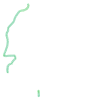

In [74]:
linea

In [75]:
type(linea) #Chequeamos a nivel dato especifico para que haya compatibilidad

shapely.geometry.multilinestring.MultiLineString

In [76]:
#Chequeo que el CRS sea el mismo que rutnac
merged6.crs

{'init': 'epsg:4326'}

#### Creamos un poligono con el buffer de distancias porque las estaciones de servicios pueden estar hasta 300mts de la ruta

In [77]:
##### Hago un buffer de los linestrings
merged6["geo_buff"] = merged6['geometry'].buffer(0.003,resolution=16)

In [78]:
merged6

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,geometry,ruta,lat,lon,Maximo Precio 2019 Super,2013 - 2014,2014 - 2015,2015 - 2016,TotalHectareassembradasOleaginosa07-2017&06-2018,Superficie (km²),Poblacion,geo_buff
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.834700,-36.788170,POINT (-59.83470 -36.78817),3.0,-59.834700,-36.788170,57.509998,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0,"POLYGON ((-59.83170 -36.78817, -59.83171 -36.7..."
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,POINT (-64.33998 -33.08114),36.0,-64.339980,-33.081140,59.340000,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0,"POLYGON ((-64.33698 -33.08114, -64.33699 -33.0..."
7,110,BUENOS AIRES,VIEYTES,AGROMARE SRL,YPF,209.065001,-57.573320,-35.279780,POINT (-57.57332 -35.27978),36.0,-57.573320,-35.279780,55.340000,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0,"POLYGON ((-57.57032 -35.27978, -57.57033 -35.2..."
11,119,RIO NEGRO,CHOELE CHOEL,GUSTAVO JULIAN Y MIGUEL A ZUAIN,AXION,95.933333,-65.670660,-39.271210,POINT (-65.67066 -39.27121),22.0,-65.670660,-39.271210,47.980000,0.094436,0.046286,0.049967,2574.9,203013,638645.0,"POLYGON ((-65.66766 -39.27121, -65.66767 -39.2..."
14,125,MENDOZA,SAN RAFAEL,LOS PUENTES SRL,YPF,480.005254,-68.380280,-34.651590,POINT (-68.38028 -34.65159),144.0,-68.380280,-34.651590,56.290001,0.069841,0.028409,0.029919,385.85,148827,1738929.0,"POLYGON ((-68.37728 -34.65159, -68.37729 -34.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,9580,RIO NEGRO,GRAL. FERNANDEZ ORO,NUEVO MADERO SRL,YPF,322.597582,-67.934618,-38.955045,POINT (-67.93462 -38.95504),21.0,-67.934618,-38.955045,46.740002,0.094436,0.046286,0.049967,2574.9,203013,638645.0,"POLYGON ((-67.93162 -38.95504, -67.93163 -38.9..."
4488,9607,BUENOS AIRES,DON TORCUATO,TRAFIGURA ARGENTINA S.A.,PUMA,72.590000,-58.615328,-34.485930,POINT (-58.61533 -34.48593),202.0,-58.615328,-34.485930,55.279999,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0,"POLYGON ((-58.61233 -34.48593, -58.61234 -34.4..."
4505,8940,CORDOBA,CHAZON,EL EUSKAL SRL,OIL COMBUSTIBLES S.A.,248.972832,-63.272800,-33.085640,POINT (-63.27280 -33.08564),4.0,-63.272800,-33.085640,59.990002,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0,"POLYGON ((-63.26980 -33.08564, -63.26981 -33.0..."
4507,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,POINT (-64.73285 -33.39702),8.0,-64.732853,-33.397025,59.990002,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0,"POLYGON ((-64.72985 -33.39702, -64.72987 -33.3..."


In [79]:
merged6=merged6.drop(['geometry'], axis=1)
merged6 # dropeo el geometry original para reemplazarlo por el geometry (poligono con el buffer) para poder hacer el merge luego

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,ruta,lat,lon,Maximo Precio 2019 Super,2013 - 2014,2014 - 2015,2015 - 2016,TotalHectareassembradasOleaginosa07-2017&06-2018,Superficie (km²),Poblacion,geo_buff
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.834700,-36.788170,3.0,-59.834700,-36.788170,57.509998,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0,"POLYGON ((-59.83170 -36.78817, -59.83171 -36.7..."
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,36.0,-64.339980,-33.081140,59.340000,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0,"POLYGON ((-64.33698 -33.08114, -64.33699 -33.0..."
7,110,BUENOS AIRES,VIEYTES,AGROMARE SRL,YPF,209.065001,-57.573320,-35.279780,36.0,-57.573320,-35.279780,55.340000,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0,"POLYGON ((-57.57032 -35.27978, -57.57033 -35.2..."
11,119,RIO NEGRO,CHOELE CHOEL,GUSTAVO JULIAN Y MIGUEL A ZUAIN,AXION,95.933333,-65.670660,-39.271210,22.0,-65.670660,-39.271210,47.980000,0.094436,0.046286,0.049967,2574.9,203013,638645.0,"POLYGON ((-65.66766 -39.27121, -65.66767 -39.2..."
14,125,MENDOZA,SAN RAFAEL,LOS PUENTES SRL,YPF,480.005254,-68.380280,-34.651590,144.0,-68.380280,-34.651590,56.290001,0.069841,0.028409,0.029919,385.85,148827,1738929.0,"POLYGON ((-68.37728 -34.65159, -68.37729 -34.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,9580,RIO NEGRO,GRAL. FERNANDEZ ORO,NUEVO MADERO SRL,YPF,322.597582,-67.934618,-38.955045,21.0,-67.934618,-38.955045,46.740002,0.094436,0.046286,0.049967,2574.9,203013,638645.0,"POLYGON ((-67.93162 -38.95504, -67.93163 -38.9..."
4488,9607,BUENOS AIRES,DON TORCUATO,TRAFIGURA ARGENTINA S.A.,PUMA,72.590000,-58.615328,-34.485930,202.0,-58.615328,-34.485930,55.279999,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0,"POLYGON ((-58.61233 -34.48593, -58.61234 -34.4..."
4505,8940,CORDOBA,CHAZON,EL EUSKAL SRL,OIL COMBUSTIBLES S.A.,248.972832,-63.272800,-33.085640,4.0,-63.272800,-33.085640,59.990002,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0,"POLYGON ((-63.26980 -33.08564, -63.26981 -33.0..."
4507,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,8.0,-64.732853,-33.397025,59.990002,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0,"POLYGON ((-64.72985 -33.39702, -64.72987 -33.3..."


In [80]:
merged6.rename(columns={'geo_buff':'geometry'}, inplace=True)

In [81]:
merged6

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,ruta,lat,lon,Maximo Precio 2019 Super,2013 - 2014,2014 - 2015,2015 - 2016,TotalHectareassembradasOleaginosa07-2017&06-2018,Superficie (km²),Poblacion,geometry
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.834700,-36.788170,3.0,-59.834700,-36.788170,57.509998,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0,"POLYGON ((-59.83170 -36.78817, -59.83171 -36.7..."
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,36.0,-64.339980,-33.081140,59.340000,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0,"POLYGON ((-64.33698 -33.08114, -64.33699 -33.0..."
7,110,BUENOS AIRES,VIEYTES,AGROMARE SRL,YPF,209.065001,-57.573320,-35.279780,36.0,-57.573320,-35.279780,55.340000,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0,"POLYGON ((-57.57032 -35.27978, -57.57033 -35.2..."
11,119,RIO NEGRO,CHOELE CHOEL,GUSTAVO JULIAN Y MIGUEL A ZUAIN,AXION,95.933333,-65.670660,-39.271210,22.0,-65.670660,-39.271210,47.980000,0.094436,0.046286,0.049967,2574.9,203013,638645.0,"POLYGON ((-65.66766 -39.27121, -65.66767 -39.2..."
14,125,MENDOZA,SAN RAFAEL,LOS PUENTES SRL,YPF,480.005254,-68.380280,-34.651590,144.0,-68.380280,-34.651590,56.290001,0.069841,0.028409,0.029919,385.85,148827,1738929.0,"POLYGON ((-68.37728 -34.65159, -68.37729 -34.6..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,9580,RIO NEGRO,GRAL. FERNANDEZ ORO,NUEVO MADERO SRL,YPF,322.597582,-67.934618,-38.955045,21.0,-67.934618,-38.955045,46.740002,0.094436,0.046286,0.049967,2574.9,203013,638645.0,"POLYGON ((-67.93162 -38.95504, -67.93163 -38.9..."
4488,9607,BUENOS AIRES,DON TORCUATO,TRAFIGURA ARGENTINA S.A.,PUMA,72.590000,-58.615328,-34.485930,202.0,-58.615328,-34.485930,55.279999,0.074044,0.029770,0.032685,3.26363e+06,307571,15625084.0,"POLYGON ((-58.61233 -34.48593, -58.61234 -34.4..."
4505,8940,CORDOBA,CHAZON,EL EUSKAL SRL,OIL COMBUSTIBLES S.A.,248.972832,-63.272800,-33.085640,4.0,-63.272800,-33.085640,59.990002,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0,"POLYGON ((-63.26980 -33.08564, -63.26981 -33.0..."
4507,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,8.0,-64.732853,-33.397025,59.990002,0.065797,0.022939,0.026363,2.64896e+06,165321,3308876.0,"POLYGON ((-64.72985 -33.39702, -64.72987 -33.3..."


In [82]:
merged6.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1025 entries, 1 to 4525
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype   
---  ------                                            --------------  -----   
 0   code                                              1025 non-null   int64   
 1   Provincia_x                                       1025 non-null   object  
 2   Localidad_x                                       1025 non-null   object  
 3   Operador_x                                        1025 non-null   object  
 4   Bandera_x                                         1025 non-null   object  
 5   AVG                                               1025 non-null   float64 
 6   Longitud                                          1025 non-null   float64 
 7   Latitud                                           1025 non-null   float64 
 8   ruta                                              1025 non-null   float64 
 9   

In [83]:
merged6.columns

Index(['code', 'Provincia_x', 'Localidad_x', 'Operador_x', 'Bandera_x', 'AVG',
       'Longitud', 'Latitud', 'ruta', 'lat', 'lon', 'Maximo Precio 2019 Super',
       '2013 - 2014', '2014 - 2015', '2015 - 2016',
       'TotalHectareassembradasOleaginosa07-2017&06-2018', 'Superficie (km²)',
       'Poblacion', 'geometry'],
      dtype='object')

In [84]:
rutnac.columns

Index(['gid', 'cod_ruta', 'valor', 'sentido', 'color', 'id_distrit', 'tmda17',
       'geometry', 'longitud_tramo'],
      dtype='object')

#### Hacemos el merge (sjoin) en base de de coincidencia de las rutas y los poligonos de las ubicaciones de las estaciones

In [85]:
b = gpd.sjoin(merged6, rutnac, op='intersects', how='left')

In [86]:
b

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,ruta,lat,...,geometry,index_right,gid,cod_ruta,valor,sentido,color,id_distrit,tmda17,longitud_tramo
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.834700,-36.788170,3.0,-59.834700,...,"POLYGON ((-59.83170 -36.78817, -59.83171 -36.7...",74.0,75.0,0003,8100.0,A,15985925.0,1.0,8100.0,0.192534
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.834700,-36.788170,3.0,-59.834700,...,"POLYGON ((-59.83170 -36.78817, -59.83171 -36.7...",50.0,51.0,0003,2910.0,A,2751236.0,19.0,2910.0,3.508964
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,36.0,-64.339980,...,"POLYGON ((-64.33698 -33.08114, -64.33699 -33.0...",1183.0,1184.0,A005,12000.0,A,16450585.0,2.0,12000.0,0.059299
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,36.0,-64.339980,...,"POLYGON ((-64.33698 -33.08114, -64.33699 -33.0...",592.0,593.0,0036,7800.0,A,15985925.0,2.0,7800.0,0.039096
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,36.0,-64.339980,...,"POLYGON ((-64.33698 -33.08114, -64.33699 -33.0...",591.0,592.0,0036,6750.0,A,15985925.0,2.0,6750.0,1.016678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,8.0,-64.732853,...,"POLYGON ((-64.72985 -33.39702, -64.72987 -33.3...",183.0,184.0,0008,13700.0,A,16450585.0,2.0,13700.0,0.813211
4507,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,8.0,-64.732853,...,"POLYGON ((-64.72985 -33.39702, -64.72987 -33.3...",167.0,168.0,0008,3800.0,A,2751236.0,2.0,3800.0,0.827493
4507,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,8.0,-64.732853,...,"POLYGON ((-64.72985 -33.39702, -64.72987 -33.3...",165.0,166.0,0008,3790.0,A,2751236.0,2.0,3790.0,3.341993
4525,9637,LA PAMPA,REALICO,SERVICIOS DEL DESIERTO SA,BLANCA,82.108333,-64.241130,-35.053390,188.0,-64.241130,...,"POLYGON ((-64.23813 -35.05339, -64.23814 -35.0...",1035.0,1036.0,0188,2350.0,A,2751236.0,21.0,2350.0,1.265449


In [87]:
b.drop_duplicates(subset='code', inplace=True)

In [88]:
b

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,ruta,lat,...,geometry,index_right,gid,cod_ruta,valor,sentido,color,id_distrit,tmda17,longitud_tramo
1,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.834700,-36.788170,3.0,-59.834700,...,"POLYGON ((-59.83170 -36.78817, -59.83171 -36.7...",74.0,75.0,0003,8100.0,A,15985925.0,1.0,8100.0,0.192534
3,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,36.0,-64.339980,...,"POLYGON ((-64.33698 -33.08114, -64.33699 -33.0...",1183.0,1184.0,A005,12000.0,A,16450585.0,2.0,12000.0,0.059299
7,110,BUENOS AIRES,VIEYTES,AGROMARE SRL,YPF,209.065001,-57.573320,-35.279780,36.0,-57.573320,...,"POLYGON ((-57.57032 -35.27978, -57.57033 -35.2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,119,RIO NEGRO,CHOELE CHOEL,GUSTAVO JULIAN Y MIGUEL A ZUAIN,AXION,95.933333,-65.670660,-39.271210,22.0,-65.670660,...,"POLYGON ((-65.66766 -39.27121, -65.66767 -39.2...",474.0,475.0,0022,8000.0,A,15985925.0,20.0,8000.0,5.211279
14,125,MENDOZA,SAN RAFAEL,LOS PUENTES SRL,YPF,480.005254,-68.380280,-34.651590,144.0,-68.380280,...,"POLYGON ((-68.37728 -34.65159, -68.37729 -34.6...",930.0,931.0,0144,1360.0,A,2751236.0,4.0,1360.0,1.633931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4478,9580,RIO NEGRO,GRAL. FERNANDEZ ORO,NUEVO MADERO SRL,YPF,322.597582,-67.934618,-38.955045,21.0,-67.934618,...,"POLYGON ((-67.93162 -38.95504, -67.93163 -38.9...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4488,9607,BUENOS AIRES,DON TORCUATO,TRAFIGURA ARGENTINA S.A.,PUMA,72.590000,-58.615328,-34.485930,202.0,-58.615328,...,"POLYGON ((-58.61233 -34.48593, -58.61234 -34.4...",283.0,284.0,0009,228044.0,A,16450585.0,1.0,228044.0,0.063397
4505,8940,CORDOBA,CHAZON,EL EUSKAL SRL,OIL COMBUSTIBLES S.A.,248.972832,-63.272800,-33.085640,4.0,-63.272800,...,"POLYGON ((-63.26980 -33.08564, -63.26981 -33.0...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4507,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,8.0,-64.732853,...,"POLYGON ((-64.72985 -33.39702, -64.72987 -33.3...",171.0,172.0,0008,4588.0,A,15985925.0,2.0,4588.0,1.659364


In [89]:
b.count()/1001

code                                                1.000000
Provincia_x                                         1.000000
Localidad_x                                         1.000000
Operador_x                                          1.000000
Bandera_x                                           1.000000
AVG                                                 1.000000
Longitud                                            1.000000
Latitud                                             1.000000
ruta                                                1.000000
lat                                                 1.000000
lon                                                 1.000000
Maximo Precio 2019 Super                            1.000000
2013 - 2014                                         1.000000
2014 - 2015                                         1.000000
2015 - 2016                                         1.000000
TotalHectareassembradasOleaginosa07-2017&06-2018    1.000000
Superficie (km²)        

#### Calculo la cantidad de estaciones por tramo

In [90]:
c=b['code'].groupby(b['gid']).count()

In [91]:
D1 = c.to_frame().reset_index()

In [92]:
D1

,gid,code
0,10.0,1
1,14.0,1
2,23.0,1
3,26.0,1
4,29.0,6
...,...,...
335,1183.0,1
336,1184.0,3
337,1185.0,2
338,1201.0,2


In [93]:
Final = b.merge(D1, on=['gid'], how='left') #uno ese numero al data frame original
Final

,code_x,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,ruta,lat,...,index_right,gid,cod_ruta,valor,sentido,color,id_distrit,tmda17,longitud_tramo,code_y
0,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.834700,-36.788170,3.0,-59.834700,...,74.0,75.0,0003,8100.0,A,15985925.0,1.0,8100.0,0.192534,3.0
1,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,36.0,-64.339980,...,1183.0,1184.0,A005,12000.0,A,16450585.0,2.0,12000.0,0.059299,3.0
2,110,BUENOS AIRES,VIEYTES,AGROMARE SRL,YPF,209.065001,-57.573320,-35.279780,36.0,-57.573320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,119,RIO NEGRO,CHOELE CHOEL,GUSTAVO JULIAN Y MIGUEL A ZUAIN,AXION,95.933333,-65.670660,-39.271210,22.0,-65.670660,...,474.0,475.0,0022,8000.0,A,15985925.0,20.0,8000.0,5.211279,5.0
4,125,MENDOZA,SAN RAFAEL,LOS PUENTES SRL,YPF,480.005254,-68.380280,-34.651590,144.0,-68.380280,...,930.0,931.0,0144,1360.0,A,2751236.0,4.0,1360.0,1.633931,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,9580,RIO NEGRO,GRAL. FERNANDEZ ORO,NUEVO MADERO SRL,YPF,322.597582,-67.934618,-38.955045,21.0,-67.934618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,9607,BUENOS AIRES,DON TORCUATO,TRAFIGURA ARGENTINA S.A.,PUMA,72.590000,-58.615328,-34.485930,202.0,-58.615328,...,283.0,284.0,0009,228044.0,A,16450585.0,1.0,228044.0,0.063397,4.0
998,8940,CORDOBA,CHAZON,EL EUSKAL SRL,OIL COMBUSTIBLES S.A.,248.972832,-63.272800,-33.085640,4.0,-63.272800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,8.0,-64.732853,...,171.0,172.0,0008,4588.0,A,15985925.0,2.0,4588.0,1.659364,1.0


In [94]:
Final.count()/1001

code_x                                              1.000000
Provincia_x                                         1.000000
Localidad_x                                         1.000000
Operador_x                                          1.000000
Bandera_x                                           1.000000
AVG                                                 1.000000
Longitud                                            1.000000
Latitud                                             1.000000
ruta                                                1.000000
lat                                                 1.000000
lon                                                 1.000000
Maximo Precio 2019 Super                            1.000000
2013 - 2014                                         1.000000
2014 - 2015                                         1.000000
2015 - 2016                                         1.000000
TotalHectareassembradasOleaginosa07-2017&06-2018    1.000000
Superficie (km²)        

In [95]:
Final.rename(columns={'code_y':'eess_por_tramo', 'code_x':'code'}, inplace=True)

In [96]:
Final

,code,Provincia_x,Localidad_x,Operador_x,Bandera_x,AVG,Longitud,Latitud,ruta,lat,...,index_right,gid,cod_ruta,valor,sentido,color,id_distrit,tmda17,longitud_tramo,eess_por_tramo
0,102,BUENOS AIRES,AZUL,M.P.C.I. S.A.,PETROBRAS,127.744999,-59.834700,-36.788170,3.0,-59.834700,...,74.0,75.0,0003,8100.0,A,15985925.0,1.0,8100.0,0.192534,3.0
1,105,CORDOBA,RIO CUARTO,LAS SIERRAS S.R.L,YPF,730.136832,-64.339980,-33.081140,36.0,-64.339980,...,1183.0,1184.0,A005,12000.0,A,16450585.0,2.0,12000.0,0.059299,3.0
2,110,BUENOS AIRES,VIEYTES,AGROMARE SRL,YPF,209.065001,-57.573320,-35.279780,36.0,-57.573320,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,119,RIO NEGRO,CHOELE CHOEL,GUSTAVO JULIAN Y MIGUEL A ZUAIN,AXION,95.933333,-65.670660,-39.271210,22.0,-65.670660,...,474.0,475.0,0022,8000.0,A,15985925.0,20.0,8000.0,5.211279,5.0
4,125,MENDOZA,SAN RAFAEL,LOS PUENTES SRL,YPF,480.005254,-68.380280,-34.651590,144.0,-68.380280,...,930.0,931.0,0144,1360.0,A,2751236.0,4.0,1360.0,1.633931,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,9580,RIO NEGRO,GRAL. FERNANDEZ ORO,NUEVO MADERO SRL,YPF,322.597582,-67.934618,-38.955045,21.0,-67.934618,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,9607,BUENOS AIRES,DON TORCUATO,TRAFIGURA ARGENTINA S.A.,PUMA,72.590000,-58.615328,-34.485930,202.0,-58.615328,...,283.0,284.0,0009,228044.0,A,16450585.0,1.0,228044.0,0.063397,4.0
998,8940,CORDOBA,CHAZON,EL EUSKAL SRL,OIL COMBUSTIBLES S.A.,248.972832,-63.272800,-33.085640,4.0,-63.272800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
999,9657,CORDOBA,SAMPACHO,PETROL SUR S.A.,PUMA,364.494919,-64.732853,-33.397025,8.0,-64.732853,...,171.0,172.0,0008,4588.0,A,15985925.0,2.0,4588.0,1.659364,1.0


In [97]:
Final.columns

Index(['code', 'Provincia_x', 'Localidad_x', 'Operador_x', 'Bandera_x', 'AVG',
       'Longitud', 'Latitud', 'ruta', 'lat', 'lon', 'Maximo Precio 2019 Super',
       '2013 - 2014', '2014 - 2015', '2015 - 2016',
       'TotalHectareassembradasOleaginosa07-2017&06-2018', 'Superficie (km²)',
       'Poblacion', 'geometry', 'index_right', 'gid', 'cod_ruta', 'valor',
       'sentido', 'color', 'id_distrit', 'tmda17', 'longitud_tramo',
       'eess_por_tramo'],
      dtype='object')

In [98]:
Final = Final.dropna()

In [100]:
Final.to_csv('data_set_final1.csv')